# 环境说明

In [2]:
# 安装所需的包
install.packages("rms")

also installing the dependencies 'fs', 'rappdirs', 'cachem', 'memoise', 'mime', 'sass', 'viridisLite', 'bslib', 'fontawesome', 'jquerylib', 'tinytex', 'farver', 'labeling', 'munsell', 'R6', 'RColorBrewer', 'fansi', 'pkgconfig', 'zoo', 'stringi', 'backports', 'gtable', 'gridExtra', 'data.table', 'viridis', 'rmarkdown', 'Formula', 'MatrixModels', 'isoband', 'scales', 'tibble', 'withr', 'mvtnorm', 'TH.data', 'sandwich', 'stringr', 'magrittr', 'checkmate', 'htmlwidgets', 'rstudioapi', 'highr', 'xfun', 'yaml', 'Hmisc', 'quantreg', 'ggplot2', 'SparseM', 'polspline', 'multcomp', 'htmlTable', 'colorspace', 'knitr'




package 'fs' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'sass' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'bslib' successfully unpacked and MD5 sums checked
package 'fontawesome' successfully unpacked and MD5 sums checked
package 'jquerylib' successfully unpacked and MD5 sums checked
package 'tinytex' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'fansi' successfull

In [3]:
sessionInfo()$otherPkgs$rms

NULL

# 代码实现

In [7]:
# 读取数据
data <- read.csv("data/train.csv")

In [8]:
head(data)

,Age,Blood_Sugar,Blood_Pressure,Weight,Heart_Disease
,<int>,<dbl>,<dbl>,<dbl>,<int>
1,58,99.97546,106.3281,62.44868,0
2,71,93.60951,134.1907,67.87585,0
3,48,119.13195,115.7733,49.26310,0
4,34,98.62651,117.6520,93.11179,0
5,62,114.05609,119.4568,71.04322,0
6,27,91.46011,131.4862,80.83883,0


In [9]:
# 加载所需的包
library(rms)

In [14]:
# 开始建模
model <- lrm(Heart_Disease ~ ., data = data, x=TRUE,y=TRUE)
print(model)

Logistic Regression Model

lrm(formula = Heart_Disease ~ ., data = data, x = TRUE, y = TRUE)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs          1000    LR chi2     238.07     R2       0.859    C       0.997    
 0            968    d.f.             4    R2(4,1000)0.209    Dxy     0.994    
 1             32    Pr(> chi2) <0.0001    R2(4,92.9)0.919    gamma   0.994    
max |deriv| 2e-05                           Brier    0.007    tau-a   0.062    

               Coef      S.E.    Wald Z Pr(>|Z|)
Intercept      -109.6707 24.8000 -4.42  <0.0001 
Age               0.4953  0.1116  4.44  <0.0001 
Blood_Sugar       0.5558  0.1228  4.52  <0.0001 
Blood_Pressure    0.0135  0.0213  0.63  0.5270  
Weight            0.0647  0.0307  2.11  0.0352  



In [15]:
# 计算概率预测值
probabilities <- predict(model)
# 设定阈值 0.5，将概率值转换为 0/1 分类
predicted_class <- ifelse(probabilities > 0.5, 1, 0)
# 计算准确率
accuracy <- mean(predicted_class == data$Heart_Disease)
print(paste("模型准确率:", round(accuracy, 4)))

[1] "模型准确率: 0.991"


In [46]:
non.slopes <- num.intercepts(model, 'coef')
non.slopes

[1] 1

In [48]:
x <- model[['x']]
head(x)

,Age,Blood_Sugar,Blood_Pressure,Weight
1,58,99.97546,106.3281,62.44868
2,71,93.60951,134.1907,67.87585
3,48,119.13195,115.7733,49.26310
4,34,98.62651,117.6520,93.11179
5,62,114.05609,119.4568,71.04322
6,27,91.46011,131.4862,80.83883


In [45]:
b <- model$coef
b

Intercept            Age    Blood_Sugar Blood_Pressure         Weight 
 -109.67072018     0.49532681     0.55576345     0.01347307     0.06469390

In [49]:
n <- nrow(x)
n

[1] 1000

In [52]:
orig.col.kept <- seq(along=model$coef)
orig.col.kept

[1] 1 2 3 4 5

In [54]:
  x.index <- function(i, ns)
    if(ns == 0) i else setdiff(i, 1 : ns) - ns

In [55]:
xcol <- x.index(orig.col.kept, non.slopes)
xcol

[1] 1 2 3 4

In [61]:
length(x)

[1] 4000

In [57]:
Xb <- function(x, b, non.slopes, n, kint=1) {
if(length(x)) matxv(x, b, kint=kint)
else if(non.slopes == 0 || ! length(kint)) rep(0, n)
else rep(b[kint], n)
}

In [64]:
0.495326807417277 * 58 + 0.555763449151369 * 99.97546 + 0.0134730684372247 * 106.3281 + 0.0646939048336378 * 62.44868 -109.6707201752

[1] -19.90644

In [69]:
head(matxv(x, b))

1         2         3         4         5         6 
-19.90644 -16.27866 -14.93901 -30.40770  -9.36674 -38.46541

In [65]:
length(matxv(x, b))

[1] 1000

In [68]:
xb <- Xb(x[, xcol, drop=FALSE], b, non.slopes, n,
       kint=1)
head(xb)

1         2         3         4         5         6 
-19.90644 -16.27866 -14.93901 -30.40770  -9.36674 -38.46541

In [72]:
y <- model[['y']]
head(y)

[1] 0 0 0 0 0 0

In [73]:
stra <- model$strata
stra

NULL

In [33]:
clas <- attr(model,"class")

In [34]:
clas

[1] "lrm" "rms" "glm"

In [37]:
name <- if(any(clas=="lrm"))"lr" else if(any(clas=="ols")) "ol" else stop("fit must be from lrm or ols")

In [38]:
name

[1] "lr"

In [31]:
model=='lr'

freq           ymedian           yunique            sumwty 
            FALSE             FALSE             FALSE             FALSE 
            stats              fail      coefficients       info.matrix 
            FALSE             FALSE             FALSE             FALSE 
                u              iter          deviance        non.slopes 
            FALSE             FALSE             FALSE             FALSE 
linear.predictors    penalty.matrix           weights              xbar 
            FALSE             FALSE             FALSE             FALSE 
           xtrans                 R                Ri        opt_method 
            FALSE             FALSE             FALSE             FALSE 
                x                 y              call            Design 
            FALSE             FALSE             FALSE             FALSE 
       scale.pred          sformula             terms            assign 
            FALSE             FALSE             FALSE             FALSE 
        na.action              fail      interceptRef 
            FALSE             FALSE             FALSE

In [27]:
# 绘制校准曲线
calibration_result <- calibrate(model, 
                                method = "boot", B = 100
                               )  # B 是 bootstrap 次数

In [28]:
calibration_result

             predy calibrated.orig calibrated.corrected    index.orig
 [1,] 6.487265e-24      0.00000000         2.993233e-23 -6.487265e-24
 [2,] 2.040545e-02      0.00000000         4.285074e-02 -2.040545e-02
 [3,] 4.081091e-02      0.03531016         7.634971e-02 -5.500743e-03
 [4,] 6.121636e-02      0.09656184         1.361604e-01  3.534549e-02
 [5,] 8.162181e-02      0.18143783         2.124165e-01  9.981602e-02
 [6,] 1.020273e-01      0.25748856         2.824633e-01  1.554613e-01
 [7,] 1.224327e-01      0.25862486         2.774079e-01  1.361921e-01
 [8,] 1.428382e-01      0.24845050         2.600278e-01  1.056123e-01
 [9,] 1.632436e-01      0.24652480         2.507915e-01  8.328117e-02
[10,] 1.836491e-01      0.23457751         2.328847e-01  5.092844e-02
[11,] 2.040545e-01      0.21594259         2.089655e-01  1.188807e-02
[12,] 2.244600e-01      0.19028547         1.798416e-01 -3.417451e-02
[13,] 2.448654e-01      0.18927053         1.769668e-01 -5.559491e-02
[14,] 2.652709e-01  


n=1000   Mean absolute error=0.004   Mean squared error=5e-04
0.9 Quantile of absolute error=0.001



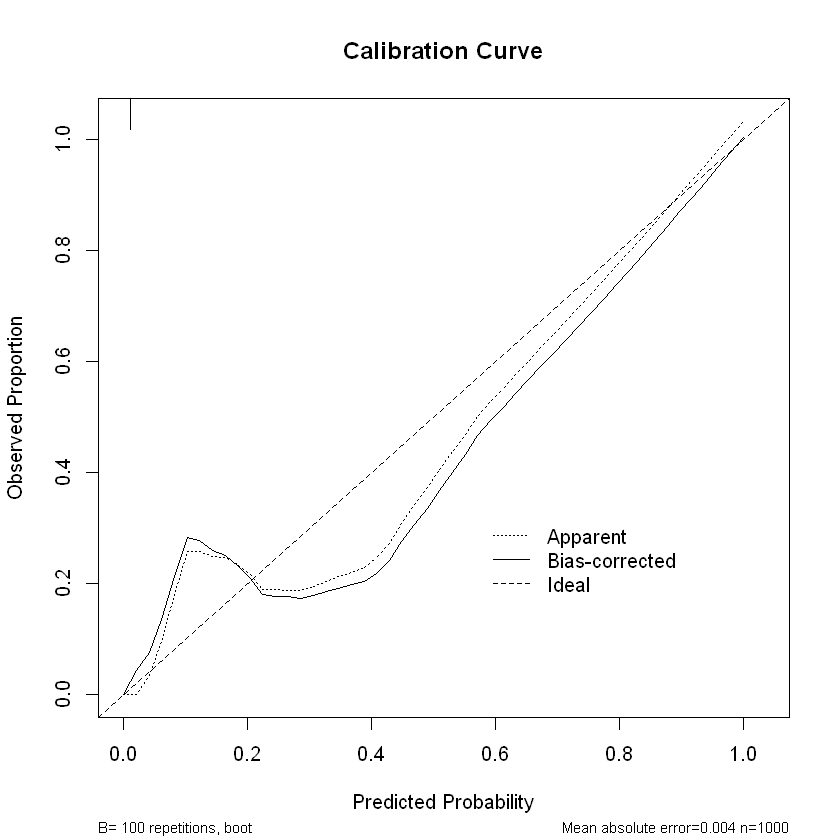

In [29]:
# 绘制校准曲线
plot(calibration_result, main = "Calibration Curve", xlab = "Predicted Probability", ylab = "Observed Proportion")